# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

En este cuaderno usaremos la "Regresión logística" para indicar si un usuario de Internet en particular hizo clic o no en un anuncio. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

## Get the Data

In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv('./data/advertising.csv',sep=",")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [41]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Clicked on Ad queremos que sea nuestra target

# 1. Exploratory Data Analysis

In [42]:
df['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64

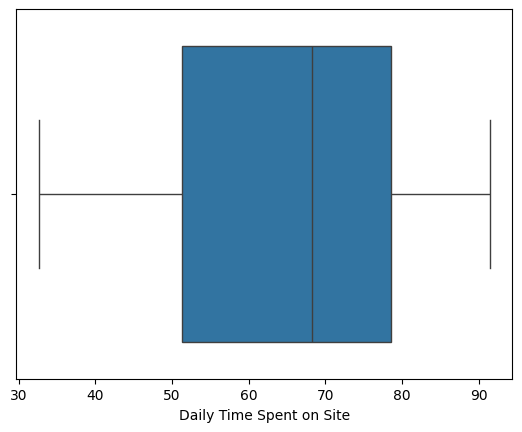

In [43]:
sns.boxplot(x= df['Daily Time Spent on Site']);

In [44]:
print(df.groupby('Clicked on Ad').size())

Clicked on Ad
0    500
1    500
dtype: int64


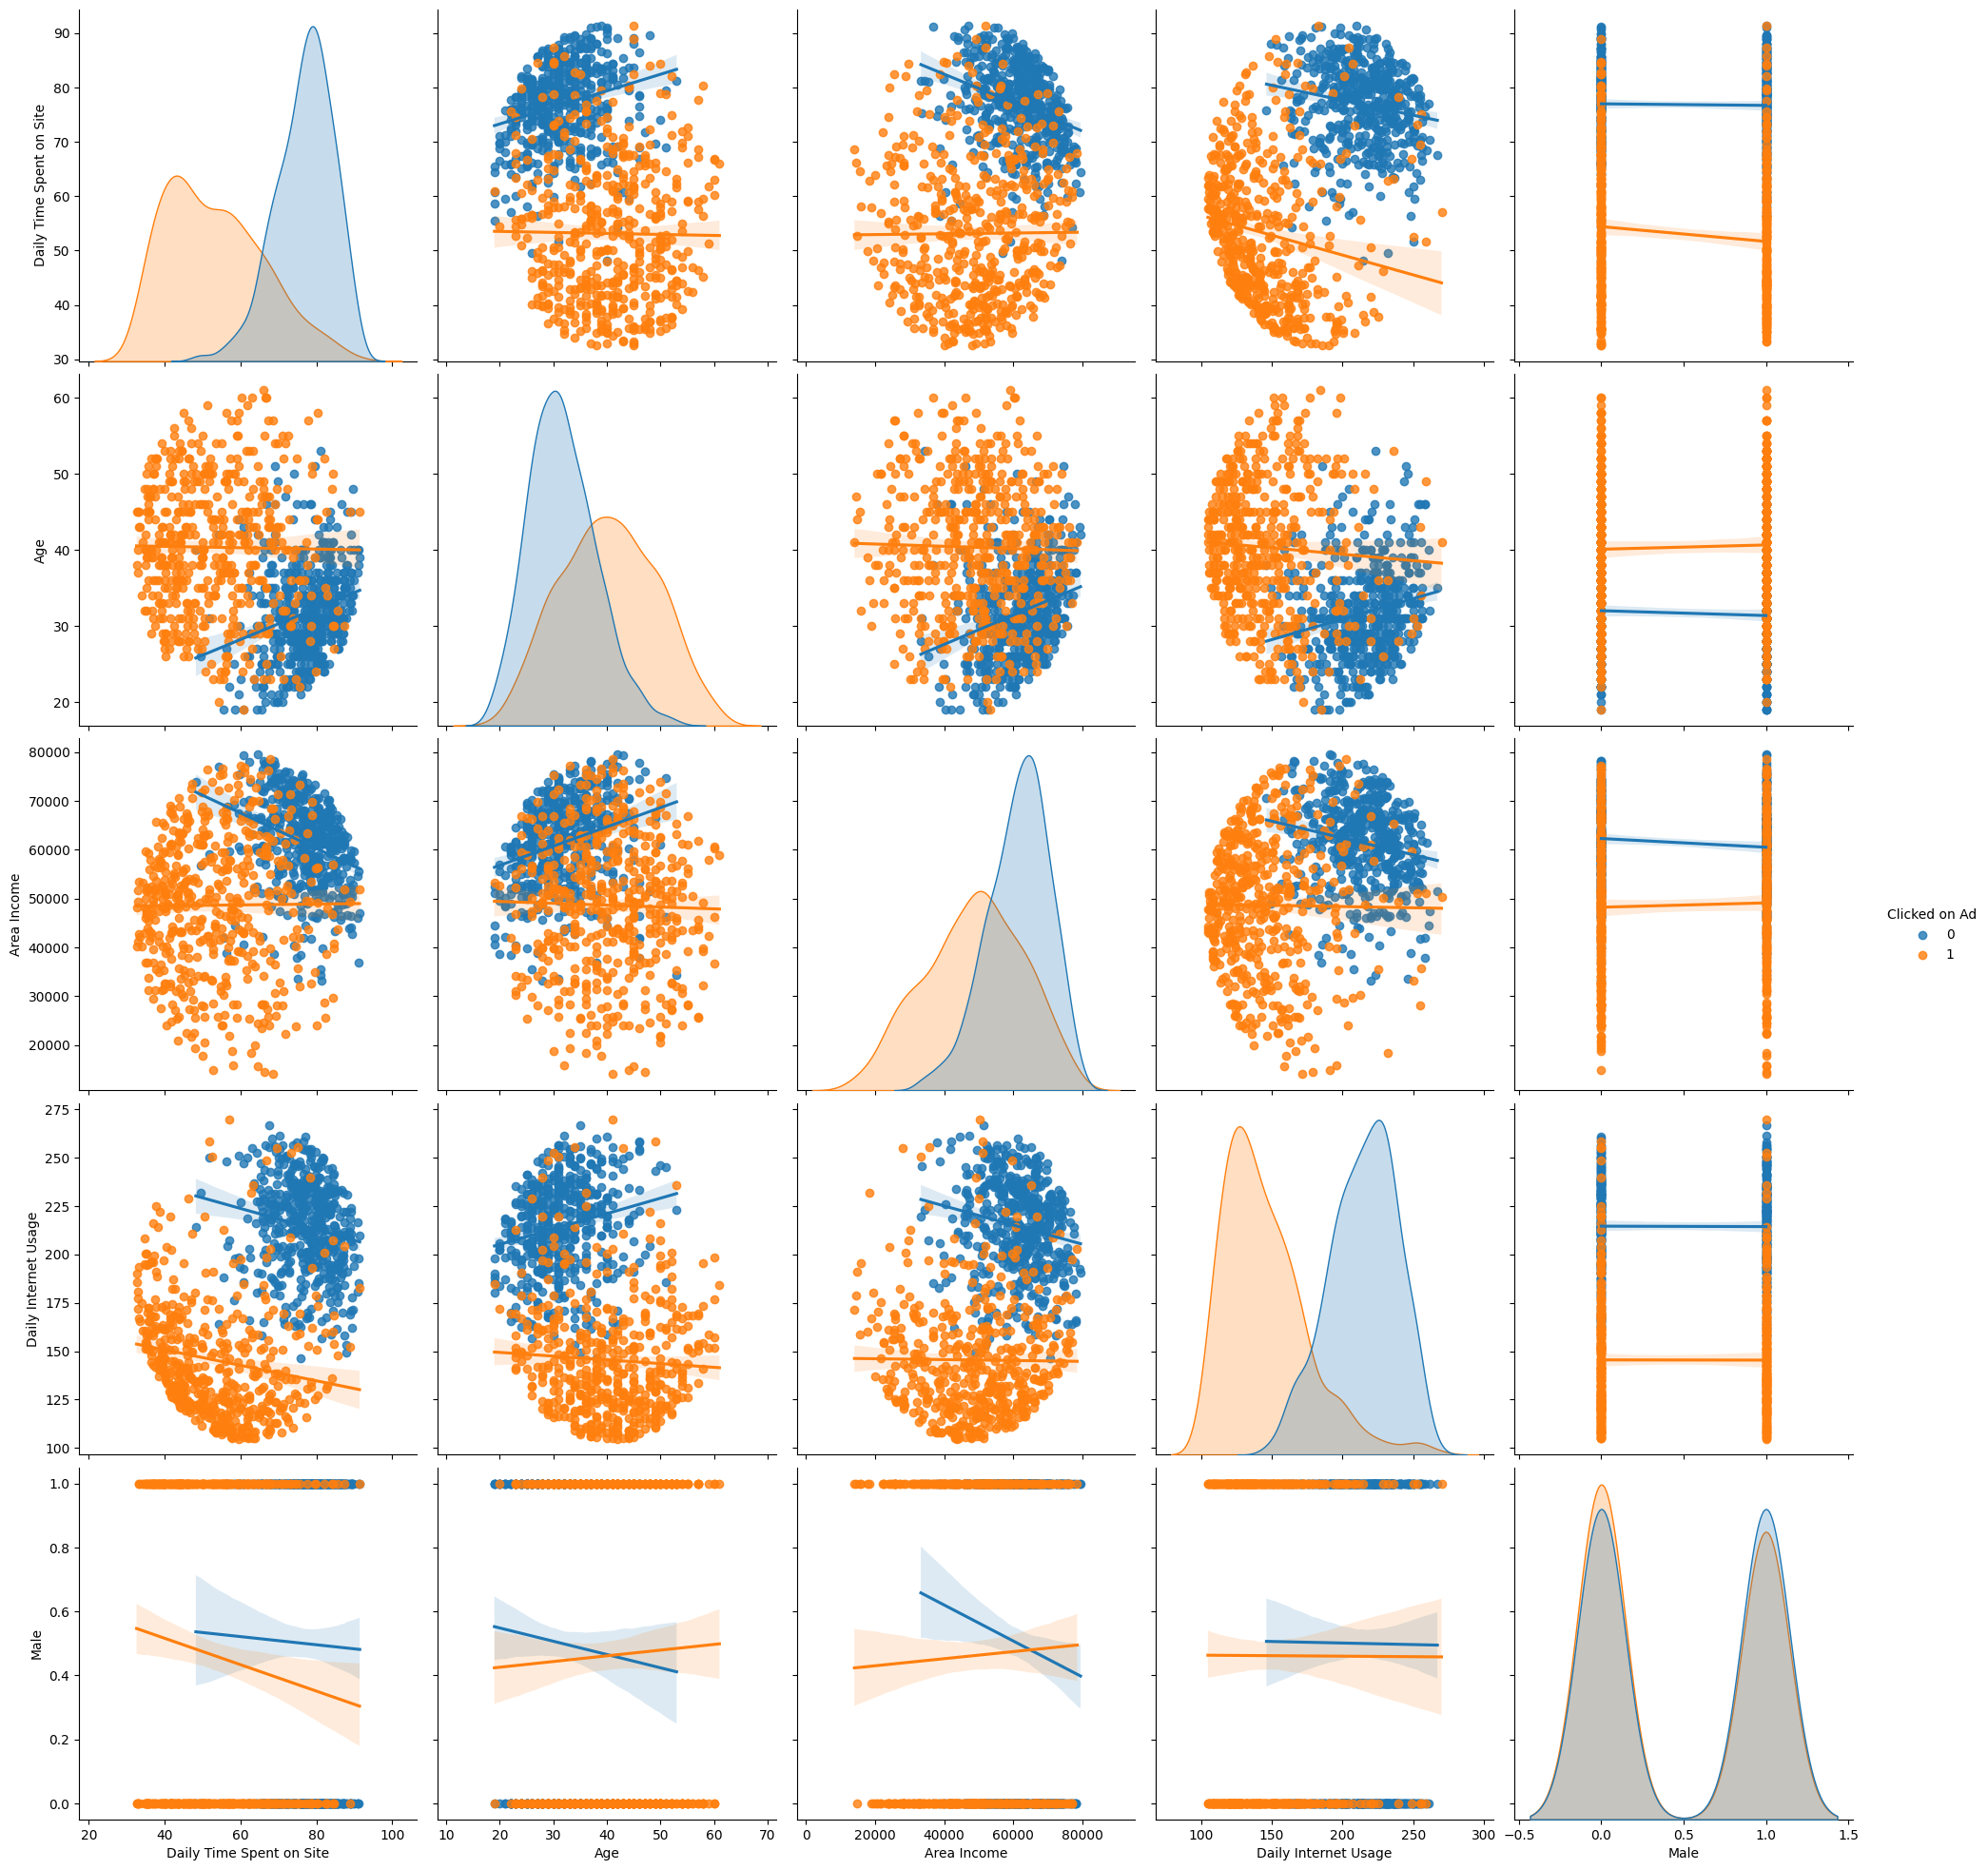

In [45]:
sns.pairplot(df.dropna(),
            hue='Clicked on Ad',
            height=4,
            vars=["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male"],
            kind='reg'); # "reg" de regresión lineal

# 2. Prepare Data for Logistic Regression


In [46]:
# Eliminamos las columnas 'Unnamed: 0' si existe
if 'Ad Topic Line' in df.columns:
    df = df.drop('Ad Topic Line', axis=1)
if 'City' in df.columns:
    df = df.drop('City', axis=1)
if 'Country' in df.columns:
    df = df.drop('Country', axis=1)
if 'Timestamp' in df.columns:
    df = df.drop('Timestamp', axis=1)

In [47]:
X = np.array(df.drop(columns=['Clicked on Ad']))
y = np.array(df['Clicked on Ad'])

In [48]:
from sklearn.linear_model import LogisticRegression

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [49]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [50]:
predictions = model.predict(X)
print(predictions)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 0 

In [51]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.99 0.01]
 [0.99 0.01]
 [0.99 0.01]
 ...
 [0.   1.  ]
 [0.1  0.9 ]
 [0.   1.  ]]


In [52]:
print(classification_report(y,predictions)) #Me da todas las métricas de error

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



#### Validación del modelo

In [53]:
validation_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [54]:
model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit(X_train, Y_train)

In [55]:
predictions2 = model2.predict(X_test)
print(accuracy_score(Y_test, predictions2))

0.945


In [56]:
acierto = accuracy_score(Y_test, predictions2)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 94.5 %
Error: 5.5 %


In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(model2,X,y,cv=5,scoring="accuracy"))

[0.985 0.96  0.99  0.955 0.96 ]


# 4. Evaluation


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [59]:
c_matrix = confusion_matrix(Y_test, predictions2)

In [60]:
print(c_matrix)

[[ 83   6]
 [  5 106]]


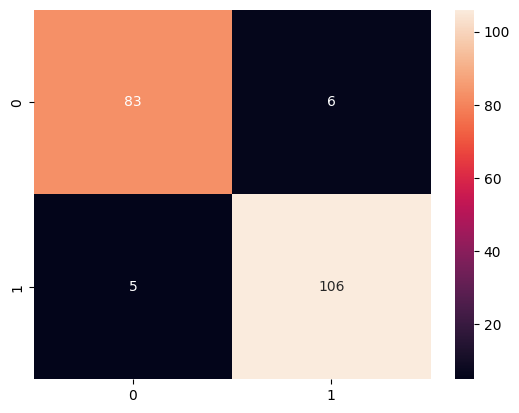

In [61]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True,fmt='d');

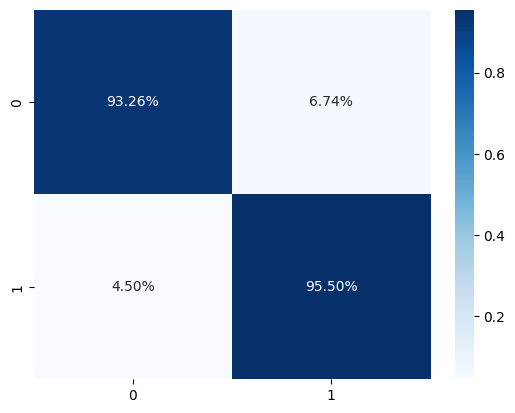

In [62]:
sns.heatmap(confusion_matrix(Y_test, predictions2, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

multilabel_confusion_matrix(Y_test, predictions2)

array([[[106,   5],
        [  6,  83]],

       [[ 83,   6],
        [  5, 106]]])

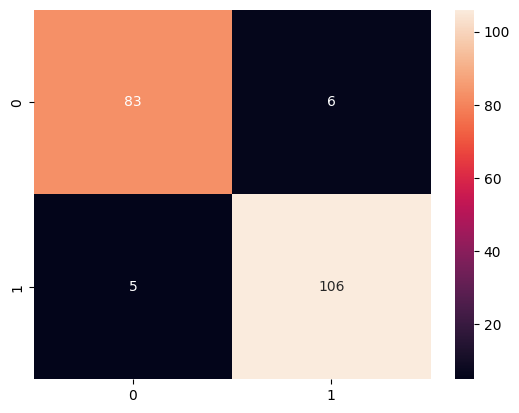

In [64]:
sns.heatmap(multilabel_confusion_matrix(Y_test, predictions2)[1], annot=True, fmt='d');